<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/HousePricePredictorUsingHuberLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Load and preprocess data

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

## Create Huber Loss object

In [43]:
from tensorflow.keras.losses import Loss

class HuberLoss(Loss):

    def __init__(self, threshold=1):
        super().__init__()
        self.threshold = threshold

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= self.threshold
        small_error_loss = tf.square(error) * 0.5
        big_error_loss = self.threshold * (tf.abs(error) - (0.5 * self.threshold))
        return tf.where(is_small_error, small_error_loss, big_error_loss)

## Create Nerual Network

In [46]:
model = keras.models.Sequential([
    keras.layers.InputLayer((13, )),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2()),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2()),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2()),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss=HuberLoss(), metrics=["mape", "mae"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


## Train the Nerual Network

In [48]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=50)
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), batch_size=16, verbose=1, callbacks=[early_stop])

Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 12.2945 - mape: 44.7980 - mae: 8.2657 - val_loss: 9.7130 - val_mape: 28.3816 - val_mae: 5.9368
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 9.2034 - mape: 25.8950 - mae: 5.6401 - val_loss: 9.1985 - val_mape: 29.4240 - val_mae: 5.8659
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 8.3721 - mape: 23.6955 - mae: 5.2366 - val_loss: 9.0109 - val_mape: 26.9757 - val_mae: 6.0863
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 7.9910 - mape: 23.7708 - mae: 5.2183 - val_loss: 8.3973 - val_mape: 26.7613 - val_mae: 5.8067
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 7.3965 - mape: 21.6400 - mae: 4.9311 - val_loss: 7.9658 - val_mape: 28.2411 - val_mae: 5.6664
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 7.3764 - mape: 22.7938 - mae: 5.1857 - val_loss: 7.9191 - val_mape: 31.7560 - val_mae: 5.8

## Plot the learning curve

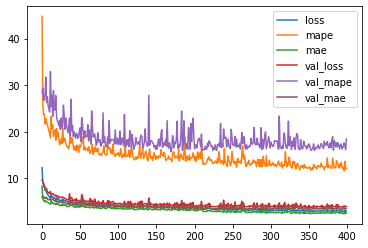

In [49]:
import pandas as pd
pd.DataFrame(history.history).plot()

## Predict data

In [50]:
y_pred = model.predict(x_test)

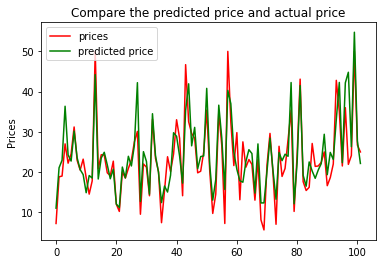

In [51]:
fig, ax = plt.subplots()
x = np.arange(y_test.shape[0])
ax.plot(y_test, label='prices', color='r')
ax.plot(y_pred, label='predicted price', color='g')
ax.set_ylabel('Prices')
ax.set_title("Compare the predicted price and actual price")
ax.legend()